# Scatter Plots

## Tree Data

Using data from this [Wikipedia Article](https://en.wikipedia.org/wiki/List_of_largest_giant_sequoias) on the largest trees on earth, a `.csv` file containing information from this table was created using the Script and put into the `Data` directory. This data was graphed on Scatter Plots to show the relationship between the largest trees heights and their circumferences and volumes.

In [13]:
import os, re, requests, random
import pandas as pd
from bs4 import BeautifulSoup as Soup
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib import ticker as pltticker

In [14]:
def parse_data():
    """Parses a Wikipedia table with information on the tallest trees on earth and converts
    to a two-dimensional list
    Returns
        Tuple with the two-dimensional list representing the table contents and the header of the table  
    """
    trees_page = Soup(requests.get('https://en.wikipedia.org/wiki/List_of_largest_giant_sequoias').text, 
                    features='lxml')
    table = trees_page.find('table', class_='wikitable sortable')
    data = list(table.find_all('tr'))
    header = []
    th = Soup(str(data[0]), features='lxml').find_all('th')
    for i, h in enumerate(th):
        if i not in [2, len(th) - 1]:
                header.append(re.sub(r'\n|\[.+\]', '', h.text))

    total = []
    for i in range(1, len(data)):
        row = []
        cells = Soup(str(data[i]), features='lxml')
        for td in cells.find_all('td'):
            cell_data = re.sub(r'[(\n)((cubic)? feet)]*', '', td.text.split('(', 1)[0].strip())
            row.append(re.sub(r'\[.+\]', '', cell_data).replace(',', '').replace(' ', ''))
        total.append([x for i, x in enumerate(row) if i not in [2, len(row) - 1]])

    return (total, header)

In [15]:
tree_data = parse_data()
# Create DataFrame using Tree Data in Pandas
df = pd.DataFrame(tree_data[0], columns=tree_data[1])
df.to_csv(os.path.normpath(f'{os.getcwd()}/Data/Largest_Trees.csv'))
df.set_index('Rank', inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(thresh=3, inplace=True)

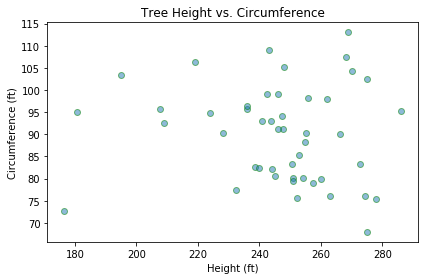

In [16]:
fig, ax = plt.subplots(1, 1)
plt.scatter(df['Height'], df['Circumference'], cmap='plasma', edgecolor='green',
                linewidth=1, alpha=0.5)
ax.set_title(f'Tree Height vs. Circumference')
ax.set_ylabel('Circumference (ft)')
ax.set_xlabel('Height (ft)')
# Limit x and y ticks to 10 ticks
pyplot.locator_params(axis='y', nbins=10)
pyplot.locator_params(axis='x', nbins=10)

plt.tight_layout()

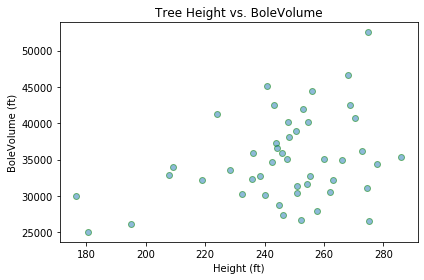

In [17]:
fig, ax = plt.subplots(1, 1)
plt.scatter(df['Height'], df['BoleVolume'], cmap='plasma', edgecolor='green',
                linewidth=1, alpha=0.5)
ax.set_title(f'Tree Height vs. BoleVolume')
ax.set_ylabel('BoleVolume (ft)')
ax.set_xlabel('Height (ft)')
# Limit x and y ticks to 10 ticks
pyplot.locator_params(axis='y', nbins=10)
pyplot.locator_params(axis='x', nbins=10)

plt.tight_layout()

## Random Values

This Scatter Plot is filled with random data from Python's using the random module in Python.

As you can see, the data really is random!

Text(0.5, 1.0, 'Random Number Generation is Actually Random!')

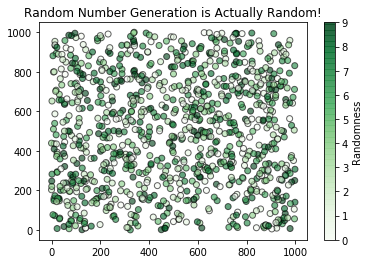

In [18]:
x_axis = [random.randint(0, 1000) for _ in range(1000)]
y_axis = [random.randint(0, 1000) for _ in range(1000)]
colors = [random.randint(0, 9) for _ in range(1000)]

plt.scatter(x_axis, y_axis, c=colors, cmap='Greens',
            edgecolor='black', linewidth=1, alpha=0.61)

cbar = plt.colorbar()
cbar.set_label('Randomness')

plt.title('Random Number Generation is Actually Random!')